In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime
from datetime import timedelta
import time
import numpy as np
from scipy.optimize import curve_fit
from collections import Counter
import seaborn as sns

In [7]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
df

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17008,NaN,International,2020-02-28,705,0,4,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17009,NaN,International,2020-02-29,705,0,6,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17010,NaN,International,2020-03-01,705,0,6,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17011,NaN,International,2020-03-02,705,0,6,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop('iso_code', axis=1)
df.keys()

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [9]:
df.dtypes

iso_code                     object
location                     object
date                         object
total_cases                   int64
new_cases                     int64
total_deaths                  int64
new_deaths                    int64
total_cases_per_million     float64
new_cases_per_million       float64
total_deaths_per_million    float64
new_deaths_per_million      float64
total_tests                 float64
new_tests                   float64
total_tests_per_thousand    float64
new_tests_per_thousand      float64
tests_units                  object
population                  float64
population_density          float64
median_age                  float64
aged_65_older               float64
aged_70_older               float64
gdp_per_capita              float64
extreme_poverty             float64
cvd_death_rate              float64
diabetes_prevalence         float64
female_smokers              float64
male_smokers                float64
handwashing_facilities      

In [10]:
print(df['date'].value_counts())

2020-05-05    210
2020-05-06    209
2020-05-04    209
2020-05-11    209
2020-05-12    209
             ... 
2019-12-31     68
2020-02-06     68
2020-03-04     58
2020-03-05     56
2020-03-03     54
Name: date, Length: 135, dtype: int64


In [11]:
list_of_countries = set(df['location'])
print(len(list_of_countries))
list_of_countries

211


{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faeroe Islands',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 

In [12]:
# for i in range(len(df['date'])):
#     if df['date'][i][:4] != "2020":
#         print(df['date'][i], i)
#         df = df.drop(i)

In [13]:
country_dates = dict(Counter(df['location']))
country_dates

{'Aruba': 52,
 'Afghanistan': 125,
 'Angola': 53,
 'Anguilla': 48,
 'Albania': 66,
 'Andorra': 61,
 'United Arab Emirates': 129,
 'Argentina': 68,
 'Armenia': 126,
 'Antigua and Barbuda': 55,
 'Australia': 135,
 'Austria': 135,
 'Azerbaijan': 128,
 'Burundi': 43,
 'Belgium': 135,
 'Benin': 58,
 'Bonaire Sint Eustatius and Saba': 42,
 'Burkina Faso': 62,
 'Bangladesh': 70,
 'Bulgaria': 65,
 'Bahrain': 134,
 'Bahamas': 57,
 'Bosnia and Herzegovina': 62,
 'Belarus': 128,
 'Belize': 51,
 'Bermuda': 55,
 'Bolivia': 62,
 'Brazil': 135,
 'Barbados': 57,
 'Brunei': 64,
 'Bhutan': 61,
 'Botswana': 43,
 'Central African Republic': 59,
 'Canada': 135,
 'Switzerland': 135,
 'Chile': 70,
 'China': 135,
 "Cote d'Ivoire": 61,
 'Cameroon': 62,
 'Democratic Republic of Congo': 62,
 'Congo': 59,
 'Colombia': 70,
 'Comoros': 12,
 'Cape Verde': 54,
 'Costa Rica': 67,
 'Cuba': 60,
 'Curacao': 51,
 'Cayman Islands': 55,
 'Cyprus': 63,
 'Czech Republic': 135,
 'Germany': 135,
 'Djibouti': 56,
 'Dominica': 52

In [64]:
def graph_total_cases(country):
    dates = []
    total_cases = []
    for i in range(len(df['location'])):
        if df['location'][i] == country:
            if df['total_cases'][i] > 0:
                dates.append(df['date'][i])
                total_cases.append(df['total_cases'][i]/ 100000)

    plt.figure(figsize=(20,15))
    plt.scatter(dates, total_cases)
    plt.xticks(rotation='vertical')
    plt.grid()
    
    plt.gca().margins(x=0)
    plt.gcf().canvas.draw()
    tl = plt.gca().get_xticklabels()
    maxsize = max([t.get_window_extent().width for t in tl])
    m = 0.4 # inch margin
    margin = m/plt.gcf().get_size_inches()[0]
    plt.gcf().subplots_adjust(left=margin, right=1.-margin)
    
    plt.title(f"{country} Total Cases", fontsize = 50)
    plt.xlabel('Dates', fontsize = 30)
    plt.ylabel("Number of cases in Hundred Thousands", fontsize = 30)
    plt.show()

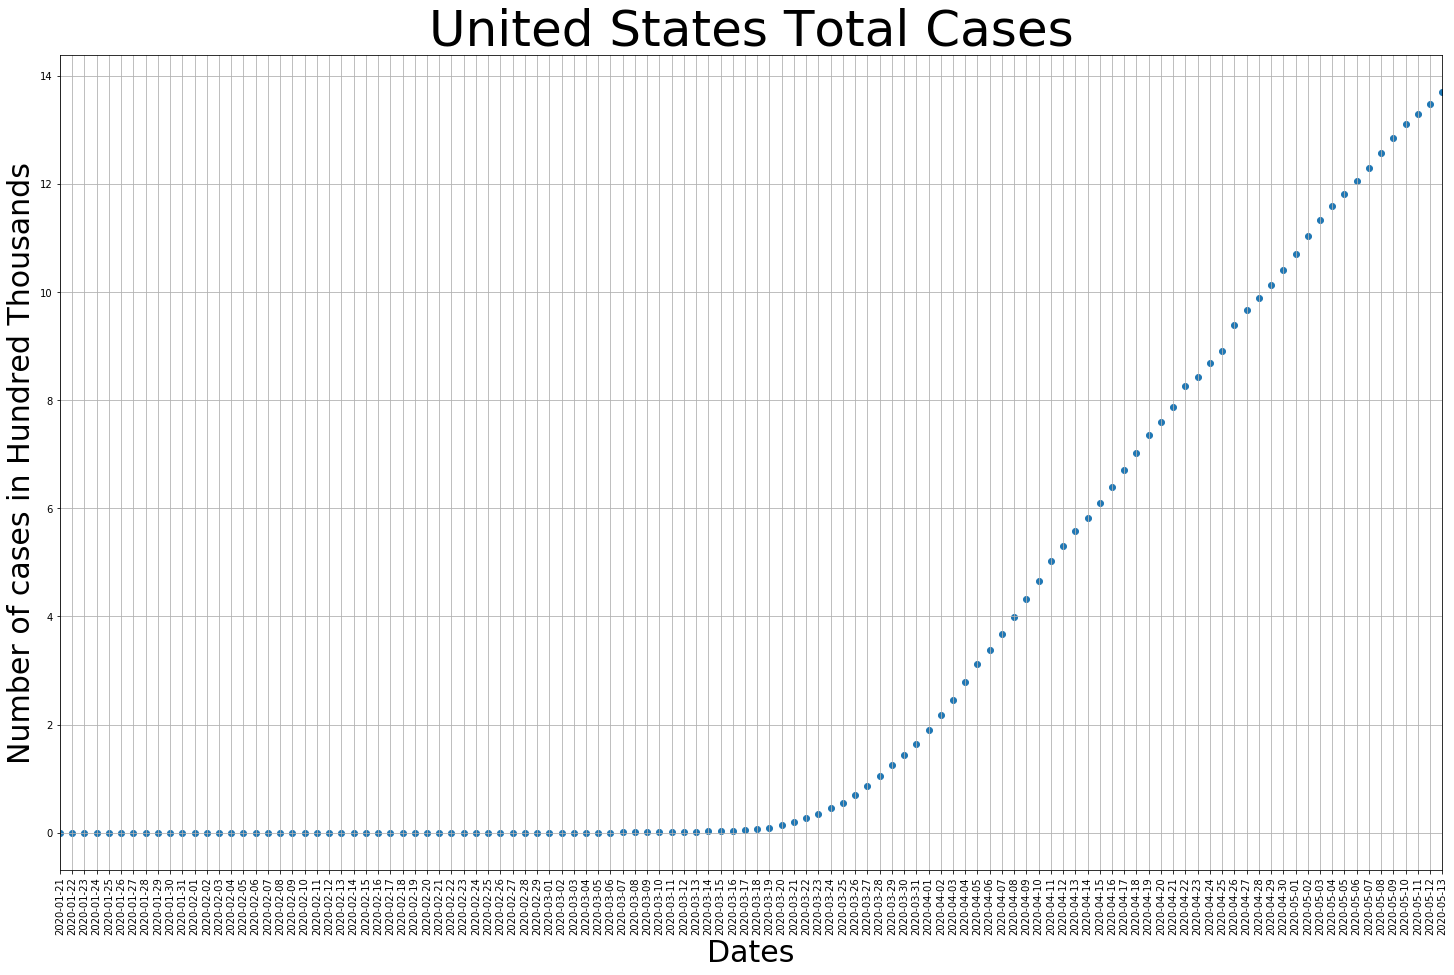

In [65]:
graph_total_cases('United States')

In [ ]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [ ]:
dates = []
total_cases = []
for i in range(len(df['location'])):
    if df['total_cases'][i] > 0:
                dates.append(df['date'][i])
                total_cases.append(df['total_cases'][i]/ 100000)
nd = matplotlib.dates.datestr2num(dates)


x =nd/max(nd)

popt, pcov = curve_fit(sigmoid, xdata, ydata, method='trf')
print(pcov)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


#logistic function
y = sigmoid(nd,*popt)
print(Y_pred)
#plot initial prediction against datapoints

plt.figure(figsize=(20,15))
plt.plot(dates, total_cases,'ro', label='data')
#plt.plot(x, y, linewidth=3.0, label='fit')


plt.xticks(rotation='vertical')
plt.grid()
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.4 # inch margin
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.show()

[[ 1.49382580e+07 -1.12793518e-01]
 [-1.12793518e-01  8.58119716e-10]]
 beta_1 = 25721.805771, beta_2 = 1.000177
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


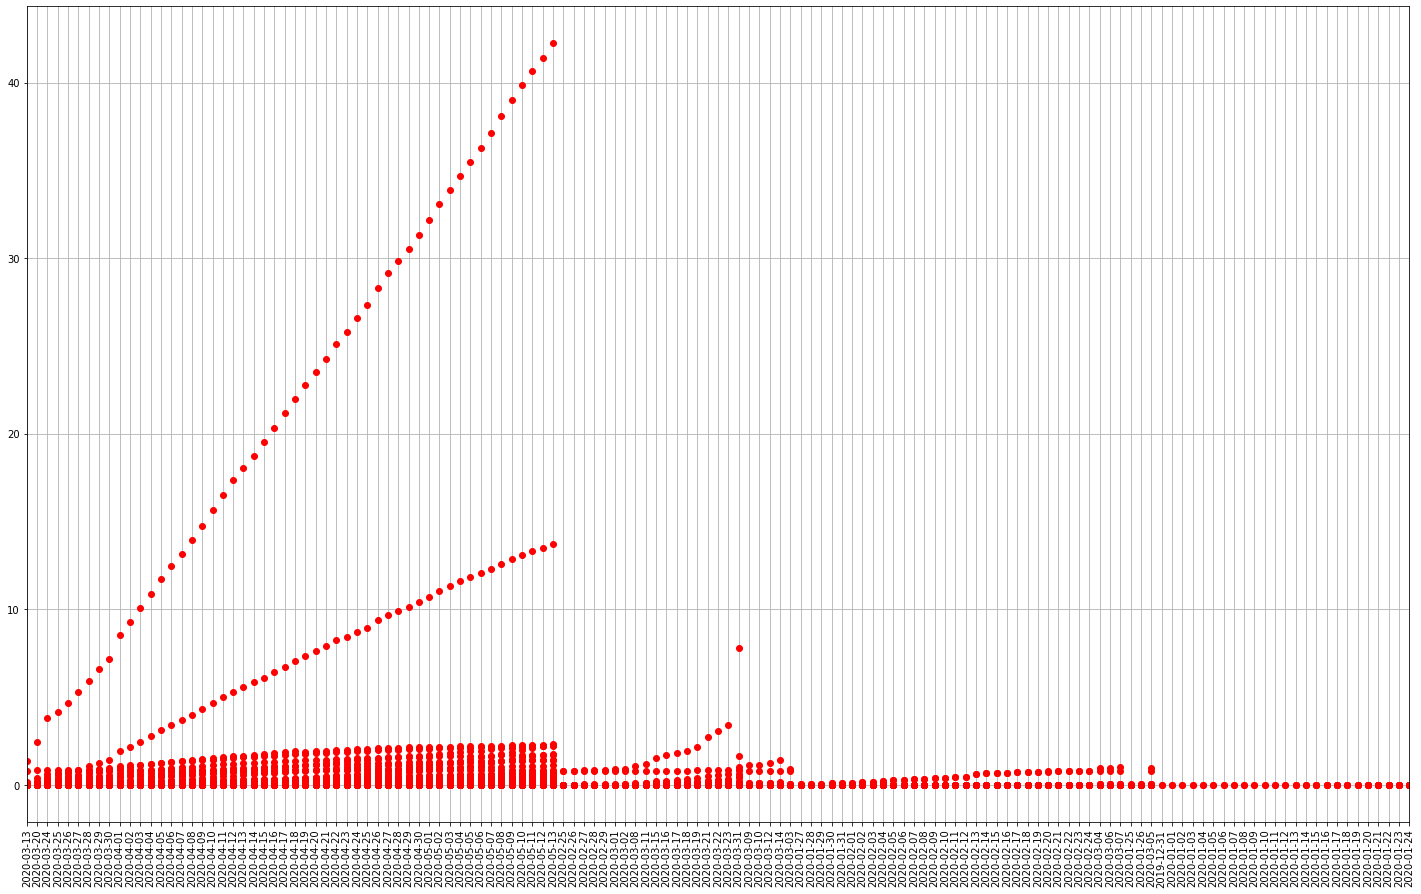

In [82]:
dates = []
total_cases = []
for i in range(len(df['location'])):
    if df['total_cases'][i] > 0:
                dates.append(df['date'][i])
                total_cases.append(df['total_cases'][i]/ 100000)
nd = matplotlib.dates.datestr2num(dates)


x =nd/max(nd)

popt, pcov = curve_fit(sigmoid, xdata, ydata, method='trf')
print(pcov)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


#logistic function
y = sigmoid(nd,*popt)
print(Y_pred)
#plot initial prediction against datapoints

plt.figure(figsize=(20,15))
plt.plot(dates, total_cases,'ro', label='data')
#plt.plot(x, y, linewidth=3.0, label='fit')


plt.xticks(rotation='vertical')
plt.grid()
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.4 # inch margin
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.show()